# Solving the collision-coalescence ODE with machine learning models

### Load Tensorflow and other useful modules

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

import pathlib

import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [2]:
import numpy as np
import xarray as xarray
import os.path

# Load the DNN models

In [3]:
def load_model(model_name):
    filename = 'saved_model/'+model_name
    if os.path.isdir(filename):
        model = tf.keras.models.load_model(filename)
    else:
        print('File not found: '+filename)
        model = False
    return model

In [4]:

#param='ReLU_AUsml1e-10_16x16x16'
#param='ReLU_AUsml1e-10_16x16x16'
#param='ReLU_AUsml1e-11_16x16x16'
#param='relu_16x16x16'

#param='ReLU_16x16x16'

#param='ReLU_SGD_16x16x16'
#param='ReLU_Adam_16x16x16'
#param='ReLU_SGD_AUsml1e-10_16x16x16'
#param='ReLU_Adam_AUsml1e-10_16x16x16'
#param='ReLU_SGD_AUsml1e-11_16x16x16'
#param='ReLU_AuLong_16x16x16'

#param='tanh_16x16x16'
#param='tanh_AUsml1e-11_16x16x16'
#param='tanh_AUsml1e-10_16x16x16'
#param='tanh_AuLong_16x16x16'

#param='SELU_AUsml1e-10_16x16x16'
#param='SELU_AUsml1e-11_16x16x16'
#param='selu_16x16x16'

param='tanh_16x16x16_small'

#string_auto1 = 'autocon_LcXcNu_16x16x16'    # This does not work at all!!
string_auto1 = 'autocon_LcXcNu_16x16'
string_auto2 = 'autocon_LcXcNuTau_16x16x16'   
string_auto3 = 'autocon_LcXcNuLr_16x16'
string_auto4 = 'autoL2_XcNuTau_v4_16x16x16'
#string_auto5 = 'autoL2_XcNuTau_v3_16x16x16'  # small AU of 1e-10
#string_auto5 = 'autoL2_XcNuTau_v4_16x16x16'  # small AU of 2e-11
#string_auto5 = 'autoL2_XcNuTau_v4_selu_16x16x16'  # small AU of 2e-11
#string_auto5 = 'autoL2_XcNuTau_v4_LReLU_16x16x16' 
string_auto5 = 'autoL2_XcNuTau_v5_'+param

string_accr1 = 'accretion_LcLr_16x16'
string_accr2 = 'accretion_LcLrNcNr_16x16'
string_accr3 = 'accretion_LcLrNcNrNu_16x16'
string_accr4 = 'accnorm_Tau_16x16'
#string_accr5 = 'accnorm_XcXrNuTau_16x16x16'
#string_accr5 = 'accnorm_XcXrNuTau_ReLU_16x16x16'
string_accr5 = 'accnorm_v4_XcXrNuTau_tanh_16x16x16'

#string_selfcloud1 = 'selfcloud_LcXcNu_16x16'
#string_selfrain1  = 'selfrain_LrXr_16x16'
string_selfcloud1 = 'selfcloud_v4_LcXcNu_tanh_16x16x16'
string_selfrain1  = 'selfrain_v4_LrXr_tanh_16x16x16' 
string_selfrain2  = 'selfrain_v4_LrNr_tanh_16x16x16'

model_auto1 = load_model(string_auto1)
model_auto2 = load_model(string_auto2)
model_auto3 = load_model(string_auto3)
model_auto4 = load_model(string_auto4)
model_auto5 = load_model(string_auto5)

model_accr1 = load_model(string_accr1)
model_accr2 = load_model(string_accr2)
model_accr3 = load_model(string_accr3)
model_accr4 = load_model(string_accr4)
model_accr5 = load_model(string_accr5)

model_selfcloud1 = load_model(string_selfcloud1)
model_selfrain1  = load_model(string_selfrain1)
model_selfrain2  = load_model(string_selfrain2)


In [5]:
# Check its architecture
model_auto5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 16)                64        
_________________________________________________________________
dense_21 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_22 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 17        
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


In [6]:
model_accr5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_21 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_22 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 17        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


### load normalization as pandas dataframe

In [7]:
def load_normalization(model_name):
    filename = 'saved_model/'+model_name+'_norm.pickle'
    if os.path.isfile(filename):
        norm = pd.read_pickle(filename)
    else:
        print('File not found: '+filename) 
        norm = False
    return norm

In [8]:
norm_auto1 = load_normalization(string_auto1)
norm_auto2 = load_normalization(string_auto2)
norm_auto3 = load_normalization(string_auto3)
norm_auto4 = load_normalization(string_auto4)
norm_auto5 = load_normalization(string_auto5)

norm_accr1 = load_normalization(string_accr1)
norm_accr2 = load_normalization(string_accr2)
norm_accr3 = load_normalization(string_accr3)
norm_accr4 = load_normalization(string_accr4)
norm_accr5 = load_normalization(string_accr5)

norm_selfcloud1 = load_normalization(string_selfcloud1)
norm_selfrain1  = load_normalization(string_selfrain1)
norm_selfrain2  = load_normalization(string_selfrain2)

In [9]:
norm_auto1

count       mean       std        min        25%        50%        75%  \
Lc  22607.0  -7.818710  0.763812 -10.415383  -8.526746  -7.831491  -7.226725   
Xc  22607.0 -25.354685  0.373432 -26.211622 -25.821230 -25.345959 -24.936858   
nu  22607.0   1.715663  1.620008   0.000000   0.000000   2.000000   4.000000   

          max  
Lc  -6.215693  
Xc -24.881920  
nu   4.000000

In [10]:
norm_auto2

count       mean       std        min        25%        50%  \
Lc   197010.0  -7.909799  0.732293 -10.416589  -8.519646  -7.842505   
Xc   197010.0 -25.684711  0.453780 -26.838385 -26.110022 -25.640196   
tau  197010.0  -7.796763  6.871776 -30.585890 -11.100715  -5.760487   
nu   197010.0   2.148774  1.381716   0.000000   1.000000   2.000000   

           75%        max  
Lc   -7.419870  -6.215683  
Xc  -25.341831 -24.881920  
tau  -2.521436  -0.162541  
nu    3.000000   4.000000

In [11]:
norm_auto3

count       mean       std        min        25%        50%        75%  \
Lc  22607.0  -7.818710  0.763812 -10.415383  -8.526746  -7.831491  -7.226725   
Xc  22607.0 -25.354685  0.373432 -26.211622 -25.821230 -25.345959 -24.936858   
Lr  22607.0 -10.536036  2.254092 -17.997009 -12.072216 -10.235135  -8.759663   
nu  22607.0   1.715663  1.620008   0.000000   0.000000   2.000000   4.000000   

          max  
Lc  -6.215693  
Xc -24.881920  
Lr  -6.379271  
nu   4.000000

In [12]:
norm_auto4

count       mean       std        min        25%        50%  \
Xc   204942.0 -25.687860  0.453729 -26.838385 -26.111135 -25.647862   
tau  204942.0  -7.527421  6.870963 -30.585890 -10.778671  -5.463533   
nu   204942.0   2.157015  1.379629   0.000000   1.000000   2.000000   

           75%        max  
Xc  -25.343531 -24.881920  
tau  -2.180768  -0.162541  
nu    3.000000   4.000000

In [13]:
norm_auto5

count       mean       std        min        25%        50%        75%  \
Xc   18647.0 -25.456949  0.330802 -26.212313 -25.819818 -25.454456 -25.152584   
tau  18647.0  -5.212305  5.011799 -25.195736  -7.579636  -3.683315  -1.235789   
nu   18647.0   1.099104  0.803894   0.000000   0.000000   1.000000   2.000000   

           max  
Xc  -24.881920  
tau  -0.162659  
nu    2.000000

In [14]:
norm_accr1

count      mean       std        min        25%       50%       75%  \
Lc  41866.0 -8.514074  1.159963 -11.516838  -9.184091 -8.532469 -7.637318   
Lr  41866.0 -9.991764  2.091049 -16.225561 -11.561262 -9.438274 -8.473399   

         max  
Lc -6.215764  
Lr -6.267503

In [15]:
norm_accr2

count       mean       std        min        25%        50%        75%  \
Lc  41866.0  -8.514074  1.159963 -11.516838  -9.184091  -8.532469  -7.637318   
Lr  41866.0  -9.991764  2.091049 -16.225561 -11.561262  -9.438274  -8.473399   
Nc  41866.0  16.950903  1.174670  13.451262  16.228137  17.044776  17.840784   
Nr  41866.0   9.109365  1.430035   4.035864   8.087564   9.115886  10.161064   

          max  
Lc  -6.215764  
Lr  -6.267503  
Nc  19.665518  
Nr  13.366846

In [16]:
norm_accr3

count       mean       std        min        25%        50%        75%  \
Lc  41866.0  -8.514074  1.159963 -11.516838  -9.184091  -8.532469  -7.637318   
Lr  41866.0  -9.991764  2.091049 -16.225561 -11.561262  -9.438274  -8.473399   
Nc  41866.0  16.950903  1.174670  13.451262  16.228137  17.044776  17.840784   
Nr  41866.0   9.109365  1.430035   4.035864   8.087564   9.115886  10.161064   
nu  41866.0   2.130368  1.613841   0.000000   0.000000   2.000000   4.000000   

          max  
Lc  -6.215764  
Lr  -6.267503  
Nc  19.665518  
Nr  13.366846  
nu   4.000000

In [17]:
norm_accr4

count      mean       std       min       25%       50%       75%  \
tau  60555.0 -5.530472  6.154701 -30.47382 -8.053584 -3.431418 -0.710282   

          max  
tau -0.051293

In [18]:
norm_accr5

count       mean       std        min        25%        50%        75%  \
Xc   21690.0 -25.482941  0.342861 -26.510252 -25.825531 -25.564007 -25.168272   
Xr   21690.0 -20.043425  1.914052 -22.068405 -21.655410 -20.747854 -18.756494   
nu   21690.0   1.102305  0.803950   0.000000   0.000000   1.000000   2.000000   
tau  21690.0  -5.080681  5.837834 -29.799511  -7.297567  -3.064323  -0.639297   

           max  
Xc  -24.881920  
Xr  -13.829313  
nu    2.000000  
tau  -0.051293

In [19]:
norm_selfcloud1

count       mean       std        min        25%        50%        75%  \
Lc  21751.0  -7.878761  0.946180 -10.821355  -8.179891  -7.825642  -7.217290   
Xc  21751.0 -25.483128  0.342776 -26.510252 -25.825610 -25.564100 -25.168531   
nu  21751.0   1.103352  0.803966   0.000000   0.000000   1.000000   2.000000   

          max  
Lc  -6.216034  
Xc -24.881920  
nu   2.000000

In [20]:
norm_selfrain1

count       mean       std        min        25%        50%        75%  \
Lr  26970.0  -8.771737  2.091960 -16.111021  -9.737632  -7.847091  -7.423930   
Xr  26970.0 -17.151564  3.326925 -22.034079 -20.410109 -17.400046 -14.094834   

          max  
Lr  -6.217121  
Xr -10.716539

In [21]:
norm_selfrain2

count      mean       std        min       25%       50%        75%  \
Lr  26970.0 -8.771737  2.091960 -16.111021 -9.737632 -7.847091  -7.423930   
Nr  26970.0  8.379766  2.240452   2.907840  6.631882  8.658063  10.224206   

          max  
Lr  -6.217121  
Nr  13.366846

In [22]:
def norm(x,stats):
  return (x - stats['mean']) / stats['std']

# Define the callable parameterization functions

In [23]:
def autocon1(qc,xc,nu):
    data = pd.DataFrame(np.array( [ np.log(qc.ravel()), np.log(xc.ravel()), nu.ravel() ]))
    data = data.T
    data.columns = [ 'Lc','Xc','nu' ] 
    normed_data = norm(data,norm_auto1)
    auto = model_auto1.predict(normed_data).flatten()
    return np.exp(np.reshape(auto,qc.shape))

In [24]:
def autocon2(qc,xc,qr,nu):
    tau  = qr/(qc+qr)
    tau  = np.where(tau < 1e-10,1e-10,tau)  # make sure we are within the training data
    data = pd.DataFrame(np.array( [ np.log(qc.ravel()), np.log(xc.ravel()), np.log(tau.ravel()), nu.ravel() ]))
    data = data.T
    data.columns = [ 'Lc','Xc','tau','nu' ] 
    normed_data = norm(data,norm_auto2)
    auto = model_auto2.predict(normed_data).flatten()
    return np.exp(np.reshape(auto,qc.shape))

In [25]:
def autocon3(qc,xc,qr,nu):
    data = pd.DataFrame(np.array( [ np.log(qc.ravel()), np.log(xc.ravel()), np.log(qr.ravel()), nu.ravel() ]))
    data = data.T
    data.columns = [ 'Lc','Xc','Lr','nu' ] 
    normed_data = norm(data,norm_auto3)
    auto = model_auto3.predict(normed_data).flatten()
    return np.exp(np.reshape(auto,qc.shape))

In [26]:
def autocon4(qc,xc,qr,nu):
    tau  = qr/(qc+qr)
    tau  = np.where(tau < 1e-10,1e-10,tau)  # make sure we are within the training data
    data = pd.DataFrame(np.array( [ np.log(xc.ravel()), np.log(tau.ravel()), nu.ravel() ]))
    data = data.T
    data.columns = [ 'Xc','tau','nu' ] 
    normed_data = norm(data,norm_auto4)
    auto = model_auto4.predict(normed_data).flatten()
    auto = qc**2 * np.exp(np.reshape(auto,qc.shape))                 
    return auto

In [27]:
def autocon5(qc,xc,qr,nu):
    tau  = qr/(qc+qr)
    tau  = np.where(tau < 1e-10,1e-10,tau)  # make sure we are within the training data
    data = pd.DataFrame(np.array( [ np.log(xc.ravel()), np.log(tau.ravel()), nu.ravel() ]))
    data = data.T
    data.columns = [ 'Xc','tau','nu' ] 
    normed_data = norm(data,norm_auto5)
    auto = model_auto5.predict(normed_data).flatten()
    auto = qc**2 * np.exp(np.reshape(auto,qc.shape))                 
    return auto

In [28]:
def selfcloud1(qc,xc,nu):
    data = pd.DataFrame(np.array( [ np.log(qc.ravel()), np.log(xc.ravel()), nu.ravel() ]))
    data = data.T
    data.columns = [ 'Lc','Xc','nu' ] 
    normed_data = norm(data,norm_selfcloud1)
    self = model_selfcloud1.predict(normed_data).flatten()
    return np.exp(np.reshape(self,qc.shape))

In [29]:
def accretion1(qc,qr):
    data = pd.DataFrame(np.array( [ np.log(qc.ravel()), np.log(qr.ravel()) ]))
    data = data.T
    data.columns = [ 'Lc','Lr' ] 
    data.head()
    normed_data = norm(data,norm_accr1)
    accr = model_accr1.predict(normed_data).flatten()
    return np.exp(np.reshape(accr,qc.shape))

In [30]:
def accretion2(qc,qr,nc,nr):
    qr = np.where(qr < 1e-10,1e-10,qr)  # make sure we are within the training data
    data = pd.DataFrame(np.array( [ np.log(qc.ravel()), np.log(qr.ravel()), np.log(nc.ravel()), np.log(nr.ravel()) ]))
    data = data.T
    data.columns = [ 'Lc','Lr','Nc','Nr' ] 
    data.head()
    normed_data = norm(data,norm_accr2)
    accr = model_accr2.predict(normed_data).flatten()
    return np.exp(np.reshape(accr,qc.shape))

In [31]:
def accretion3(qc,qr,nc,nr,nu):
    data = pd.DataFrame(np.array( [ np.log(qc.ravel()), np.log(qr.ravel()), np.log(nc.ravel()), np.log(nr.ravel()), nu.ravel() ]))
    data = data.T
    data.columns = [ 'Lc','Lr','Nc','Nr','nu' ] 
    data.head()
    normed_data = norm(data,norm_accr3)
    accr = model_accr3.predict(normed_data).flatten()
    return np.exp(np.reshape(accr,qc.shape))

In [32]:
def accretion4(qc,qr):
    tau  = qr/(qc+qr)
    tau  = np.where(tau < 1e-10,1e-10,tau)  # make sure we are within the training data
    data = pd.DataFrame(np.array([ np.log(tau.ravel()) ]))
    data = data.T
    data.columns = [ 'tau' ] 
    normed_data = norm(data,norm_accr4)
    accr = model_accr4.predict(normed_data).flatten()
    accr = kcr * qc * qr * np.exp(np.reshape(accr,qc.shape))
    return accr

In [33]:
def accretion5(qc,qr,xc,xr,nu):
    tau  = qr/(qc+qr)
    tau  = np.where(tau < 1e-10,1e-10,tau)  # make sure we are within the training data
    qr   = np.where(qr < 1e-10,1e-10,qr)  
    data = pd.DataFrame(np.array([ np.log(xc.ravel()), np.log(xr.ravel()), nu.ravel(), np.log(tau.ravel()) ]))
    data = data.T
    data.columns = [ 'Xc','Xr','nu','tau' ] 
    normed_data = norm(data,norm_accr5)
    accr = model_accr5.predict(normed_data).flatten()
    accr = kcr * qc * qr * np.exp(np.reshape(accr,qc.shape))
    return accr

In [34]:
def selfrain1(qr,xr):
    xstar = 2.6e-10   # xstar in kg
    qr   = np.where(qr < 1e-10,1e-10,qr) 
#    xr   = np.where(xr < xstar,xstar,xr) 
    data = pd.DataFrame(np.array( [ np.log(qr.ravel()), np.log(xr.ravel()) ]))
    data = data.T
    data.columns = [ 'Lr','Xr' ] 
    normed_data = norm(data,norm_selfrain1)
    self = model_selfrain1.predict(normed_data).flatten()
    return np.exp(np.reshape(self,qr.shape))

In [35]:
def selfrain2(qr,nr):
    qr   = np.where(qr < 1e-10,1e-10,qr) 
    data = pd.DataFrame(np.array( [ np.log(qr.ravel()), np.log(nr.ravel()) ]))
    data = data.T
    data.columns = [ 'Lr','Nr' ] 
    normed_data = norm(data,norm_selfrain2)
    self = model_selfrain2.predict(normed_data).flatten()
    return np.exp(np.reshape(self,qr.shape))

# SB2001 warm-rain model

In [36]:

kcc = 9.44e9      # Long kernel in m3 kg-2 s-1 
kcr = 5.78        # Long kernel in m3 kg-1 s-1 
krr = 4.33

xstar = 2.6e-10   # xstar in kg
a_phi = 600.
p_phi = 0.68
#a_phi = 954.
#p_phi = 0.773

rhow = 1e3
def drop_mass(drop_radius):
    return 4./3. *np.pi * rhow * drop_radius**3

def autoconSB(qc,xc,nu,qr):
    auto = kcc/(20*xstar) * (nu+2.0)*(nu+4.0)/(nu+1.0)**2 * qc**2 * xc**2
    tau  = qr/(qc+qr+1e-15)
    taup = np.power(tau,p_phi)
    phi  = a_phi * taup * (1.0 - taup)**3
    auto = auto * (1.0+phi)
#    print("  qc=%0.3e"%qc[0,0]+",  xc=%0.3e"%xc[0,0]+",  qr=%0.3e"%qr[0,0]+",  nu=%2.1f"%nu+",  auto=%0.3e"%auto[0,0])
    return auto

def accretionSB(qc,qr):
    tau = qr/(qc+qr)
    phi = (tau / (tau + 5e-4))**4
    acc = kcr * qc * qr * phi
    return acc

def selfcloudSB(qc,nu):
    self = kcc * (nu+2.0)/(nu+1.0) * qc**2
    return self

def selfrainSB(qr,nr):
    self = krr * qr * nr
    return self

# Scalar sanity test of process rate parameterizations

In [37]:
qc = np.array(1.0e-3)
qr = np.array(0.1e-3)
nu = np.array(0.0)
rc = np.array(12e-6)
rr = np.array(100e-6)
xc = drop_mass(rc)
xr = drop_mass(rr)
nc = qc/xc
nr = qr/xr

### autoconversion

In [38]:
autoconSB(qc,xc,nu,qr)

4.725418859437707e-08

In [39]:
autocon1(qc,xc,nu)

3.0184967e-08

In [40]:
autocon2(qc,xc,qr,nu)

7.321184e-08

In [41]:
autocon3(qc,xc,qr,nu)

6.627195e-08

In [42]:
autocon4(qc,xc,qr,nu)

8.180425316095352e-08

In [43]:
autocon5(qc,xc,qr,nu)

8.625565469264984e-08

### accretion

In [44]:
accretionSB(qc,qr)

5.654569400551449e-07

In [45]:
accretion1(qc,qr)

4.92953e-07

In [46]:
accretion2(qc,qr,nc,nr)

5.163266e-07

In [47]:
accretion3(qc,qr,nc,nr,nu)

5.434686e-07

In [48]:
accretion4(qc,qr)

5.055234470367432e-07

In [49]:
accretion5(qc,qr,xc,xr,nu)

4.917078849077225e-07

### selfcollection of cloud droplets

In [50]:
selfcloudSB(qc,nu)

18880.0

In [51]:
selfcloud1(qc,xc,nu)

16175.834

### selfcollection of raindrops

In [52]:
selfrainSB(qr,nr)

10.3371135538186

In [53]:
selfrain1(qr,xr)

13.445317

In [54]:
selfrain2(qr,nr)

15.0959215

# Time loop

In [56]:
dt = 5                   # time step in s 
models = 2               # number of models that are tested in the loop (usually 2, SB and one ML model)

ltest_scalar = False     # a test-run with a scalar loop mostly for debugging
ltest_loop   = False     # a test-run with a small parameter space

# initial condition
if ltest_scalar:
    ntmax = 10
    qc0 = np.array( 2.0e-3 )
    rc0 = np.array( 13e-6 )
    nu0 = np.array( 1 )
    xc0 = drop_mass(rc0)
elif ltest_loop:
    ntmax = int(720/dt)
    qc0 = np.array( [2.0e-3,5e-3] )
    rc0 = np.array( [13e-6,15e-6] )
    nu0 = np.array( [0,2] )
    xc0 = drop_mass(rc0)
else:
    ntmax = int(7200/dt)
#    ntmax = 14400
    qc0 = np.array( [0.2e-3,0.3e-3,0.5e-3,0.7e-3,1.0e-3,1.5e-3,2e-3,3e-3,4e-3,5e-3] )
    rc0 = np.array( [10e-6, 10.5e-6, 11e-6, 12e-6, 13e-6, 14e-6, 15e-6] )
    nu0 = np.array( [0,1,2,3,4] )
    xc0 = drop_mass(rc0)

tend = ntmax*dt

if ltest_scalar:
    nqc = 1
    nrc = 1
    nnu = 1
else:
    nqc = len(qc0)
    nrc = len(rc0)
    nnu = len(nu0)
    
dim = nqc*nrc*nnu

qc = np.zeros((models,nqc,nrc,nnu,ntmax))
qr = np.zeros((models,nqc,nrc,nnu,ntmax))
AU = np.zeros((models,nqc,nrc,nnu,ntmax))
AC = np.zeros((models,nqc,nrc,nnu,ntmax))
t10 = np.full((models,nqc,nrc,nnu),tend)
t50 = np.full((models,nqc,nrc,nnu),tend)

# a linear time coordinate
time = np.linspace(0,ntmax*dt,ntmax)

# simple integer coordinate for the models
models = np.array([0,1]) 

print("dim   = %d"%dim)
print("ntmax = %d"%ntmax)

dim   = 350
ntmax = 1440


### Here we integrate the whole 3d parameter space in parallel 

This is more efficient than individual (scalar) calls to the ML models. The downside is that we have to run all simulations over the full time interval and cannot stop when we haved reached t50 or 2*t50. Hence, patience is nevertheless needed. 

In [57]:

models  = 2
MLmodel = 9

Nmin = 1e-15

qr0 = 0.0

for m in range(0,models):    
    print('m = %d'%m+' for MLmodel = %d'%MLmodel) 
    nt = 1
    if m == 0:
        nout = 1000
    else:
        nout = 100
    # initial condition    
    rc3d, Lc3d, nu3d = np.meshgrid(rc0,qc0,nu0)
    Xc3d = 4./3. * 3.14 * rhow * rc3d**3
    Nc3d = Lc3d/Xc3d
    Lr3d = np.full((nqc,nrc,nnu),qr0)
    Nr3d = np.full((nqc,nrc,nnu),Nmin)
    Xr3d = Lr3d/Nr3d
    Xr3d = np.where(Xr3d<xstar,xstar,Xr3d)
    qc[m,:,:,:,0] = Lc3d
    qr[m,:,:,:,0] = Lr3d   
    # start time loop    
    while nt < ntmax:
        if m == 0:
            auto = autoconSB(Lc3d,Xc3d,nu3d,Lr3d)
            accr = accretionSB(Lc3d,Lr3d)
            sc_c = selfcloudSB(Lc3d,nu3d)
            sc_r = selfrainSB(Lr3d,Nr3d)
        elif m == 1 and MLmodel == 1:
            auto = autocon1(Lc3d,Xc3d,nu3d)
            accr = accretion1(Lc3d,Lr3d)
#            accr = accretion2(Lc3d,Lr3d,Nc3d,Nr3d)  # this does not work!
            sc_c = selfcloud1(Lc3d,Xc3d,nu3d)
            sc_r = selfrain1(Lr3d,Xr3d)
        elif m == 1 and MLmodel == 2:
            auto = autocon2(Lc3d,Xc3d,Lr3d,nu3d)
            accr = accretion2(Lc3d,Lr3d,Nc3d)    
            sc_c = selfcloud1(Lc3d,Xc3d,nu3d)
            sc_r = selfrain1(Lr3d,Xr3d)
        elif m == 1 and MLmodel == 4:
            auto = autocon2(Lc3d,Xc3d,Lr3d,nu3d)
            accr = accretion4(Lc3d,Lr3d)
            sc_c = selfcloud1(Lc3d,Xc3d,nu3d)
            sc_r = selfrain1(Lr3d,Xr3d)
        elif m == 1 and MLmodel == 5:   # not bad, but dependency on rc and nu is still too weak
            auto = autocon3(Lc3d,Xc3d,Lr3d,nu3d)
            accr = accretion4(Lc3d,Lr3d)
            sc_c = selfcloud1(Lc3d,Xc3d,nu3d)
            sc_r = selfrain1(Lr3d,Xr3d)
        elif m == 1 and MLmodel == 6:   # with L2-scaling: good, but suffers from bad accretion
            auto = autocon4(Lc3d,Xc3d,Lr3d,nu3d)
            accr = accretion2(Lc3d,Lr3d,Nc3d)   
            sc_c = selfcloud1(Lc3d,Xc3d,nu3d)
            sc_r = selfrain1(Lr3d,Xr3d)
        elif m == 1 and MLmodel == 7:   # best so far, L2-scaling does indeed help!
            auto = autocon4(Lc3d,Xc3d,Lr3d,nu3d)
            accr = accretion4(Lc3d,Lr3d)
            sc_c = selfcloud1(Lc3d,Xc3d,nu3d)
            sc_r = selfrain1(Lr3d,Xr3d)
        elif m == 1 and MLmodel == 8:   # new accretion with Xr and Xc
            auto = autocon4(Lc3d,Xc3d,Lr3d,nu3d)
            accr = accretion5(Lc3d,Lr3d,Xc3d,Xr3d,nu3d)
            sc_c = selfcloud1(Lc3d,Xc3d,nu3d)
            sc_r = selfrain1(Lr3d,Xr3d)
        elif m == 1 and MLmodel == 9:   # with small value of AU 
            auto = autocon5(Lc3d,Xc3d,Lr3d,nu3d)
            accr = accretion5(Lc3d,Lr3d,Xc3d,Xr3d,nu3d)
            sc_c = selfcloud1(Lc3d,Xc3d,nu3d)
            sc_r = selfrain1(Lr3d,Xr3d)
        elif m == 1 and MLmodel == 10: # new rain-selfcollection  
            auto = autocon5(Lc3d,Xc3d,Lr3d,nu3d)
            accr = accretion5(Lc3d,Lr3d,Xc3d,Xr3d,nu3d)
            sc_c = selfcloud1(Lc3d,Xc3d,nu3d)
            sc_r = selfrain2(Lr3d,Nr3d)
        # for debugging
        if m == 1 and dim == 1 and np.mod(nt,1) == 0:
            print('   nt=%d'%nt+",  Lc=%0.3e"%Lc3d[0,0,0]+", Lr=%0.3e"%Lr3d[0,0,0]+",  Xc=%0.3e"%Xc3d[0,0,0]+",  Xr=%0.3e"%Xr3d[0,0,0]+', auto=%0.3e'%auto[0,0,0]+", accr=%0.3e"%accr[0,0,0])
        # time integration
        Lc3d = Lc3d - auto*dt - accr*dt
        Lr3d = Lr3d + auto*dt + accr*dt
        Nc3d = Nc3d - accr/Xc3d*dt - sc_c*dt
        if m == 1:
            Nc3d = Nc3d - 2.0/xstar*auto*dt # for SB2001 included in self
        Nr3d = Nr3d + 1.0/xstar*auto*dt - sc_r*dt
        Xc3d = np.where(Nc3d>Nmin,Lc3d/Nc3d,Lc3d/(Nc3d+Nmin))
        Xr3d = np.where(Nc3d>Nmin,Lr3d/Nr3d,Lr3d/(Nr3d+Nmin))
        # store some arrays
        AU[m,:,:,:,nt] = auto
        AC[m,:,:,:,nt] = accr
        qc[m,:,:,:,nt] = Lc3d
        qr[m,:,:,:,nt] = Lr3d
        # conversion time scales
        t10[m,:,:,:] = np.where(Lr3d < 0.1*Lc3d,time[nt],t10[m,:,:,:])
        t50[m,:,:,:] = np.where(Lr3d < 0.5*Lc3d,time[nt],t50[m,:,:,:])
        # simple stopping mechanism, if all simulations reached t50, we exit the loop
        # (might be useless, if there is a simulation that does not produce rain before tend)
        if np.mod(nt,nout) == 0:
            count = np.count_nonzero(1.3*t50[m,:,:,:] < time[nt])
            print('   nt=%d'%nt+', %4.1f'%(count/dim*100)+" % done")
#            if (1.3*np.max(t50[m,:,:,:]) < time[nt]):
#                break        
        nt = nt+1
print('Done!')      

m = 0 for MLmodel = 9
   nt=1000, 73.1 % done
m = 1 for MLmodel = 9
   nt=100,  8.6 % done
   nt=200, 28.6 % done


/Volumes/MyBook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/Volumes/MyBook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
/Volumes/MyBook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/Volumes/MyBook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in greater
/Volumes/MyBook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in greater
/Volumes/MyBook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:96: RuntimeWarning: invalid value encountered in less
/Volumes/MyBook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in less
/Volumes/MyBo

   nt=300, 42.3 % done
   nt=400, 51.4 % done
   nt=500, 56.9 % done
   nt=600, 62.6 % done
   nt=700, 66.9 % done
   nt=800, 71.1 % done
   nt=900, 73.4 % done
   nt=1000, 75.4 % done
   nt=1100, 77.4 % done
   nt=1200, 80.3 % done
   nt=1300, 82.3 % done
   nt=1400, 83.7 % done
Done!


In [58]:
t10.shape

(2, 10, 7, 5)

In [59]:
t50

array([[[[7200, 7200, 7200, 7200, 7200],
         [7200, 7200, 7200, 7200, 7200],
         [7200, 7200, 7200, 7200, 7200],
         [6514, 7200, 7200, 7200, 7200],
         [5278, 7200, 7200, 7200, 7200],
         [4333, 6029, 6984, 7200, 7200],
         [3587, 5023, 5819, 6339, 6704]],

        [[7154, 7200, 7200, 7200, 7200],
         [6234, 7200, 7200, 7200, 7200],
         [5483, 7200, 7200, 7200, 7200],
         [4348, 6084, 7114, 7200, 7200],
         [3522, 4893, 5688, 6219, 6599],
         [2892, 4022, 4663, 5083, 5383],
         [2396, 3352, 3882, 4227, 4473]],

        [[4297, 6249, 7200, 7200, 7200],
         [3747, 5373, 6389, 7084, 7200],
         [3297, 4678, 5528, 6109, 6534],
         [2616, 3657, 4277, 4698, 4998],
         [2121, 2942, 3422, 3737, 3967],
         [1741, 2421, 2801, 3057, 3237],
         [1441, 2016, 2336, 2541, 2691]],

        [[3077, 4468, 5348, 5954, 6394],
         [2681, 3847, 4568, 5068, 5428],
         [2361, 3347, 3952, 4368, 4673],
         [

# Convert to xarray dataset and write to netcdf

In [60]:
models = [0,1]

qr_data = xarray.DataArray(qr,dims=('model','qc0','rc0','nu0','time'),coords=[models,qc0,rc0,nu0,time], name='qr')
qc_data = xarray.DataArray(qc,dims=('model','qc0','rc0','nu0','time'),coords=[models,qc0,rc0,nu0,time], name='qc')
au_data = xarray.DataArray(AU,dims=('model','qc0','rc0','nu0','time'),coords=[models,qc0,rc0,nu0,time], name='au')
ac_data = xarray.DataArray(AC,dims=('model','qc0','rc0','nu0','time'),coords=[models,qc0,rc0,nu0,time], name='ac')

t10_data = xarray.DataArray(t10,dims=('model','qc0','rc0','nu0'),coords=[models,qc0,rc0,nu0], name='t10')
t50_data = xarray.DataArray(t10,dims=('model','qc0','rc0','nu0'),coords=[models,qc0,rc0,nu0], name='t50')

qr_data.attrs['long_name'] = 'rain water content'
qc_data.attrs['long_name'] = 'cloud water content'
au_data.attrs['long_name'] = 'autoconversion rate'
ac_data.attrs['long_name'] = 'accretion rate'

t10_data.attrs['long_name'] = 'conversion time scale t10'
t50_data.attrs['long_name'] = 'conversion time scale t50'

qc0_data = xarray.DataArray(qc0,dims='qc0',coords=[qc0],name='qc0')
qc0_data.attrs['long_name'] = 'initial cloud water content'

rc0_data = xarray.DataArray(rc0,dims='rc0',coords=[rc0],name='rc0')
rc0_data.attrs['long_name'] = 'initial cloud water mean radius'

nu0_data = xarray.DataArray(nu0,dims='nc0',coords=[nu0],name='nu0')
nu0_data.attrs['long_name'] = 'initial cloud shape parameter'

qr_data.attrs['units'] = 'kg/m3'
qc_data.attrs['units'] = 'kg/m3'
qc0_data.attrs['units'] = 'kg/m3'
t10_data.attrs['units'] = 's'
t50_data.attrs['units'] = 's'

ds = xarray.merge([ qc_data, qr_data, t10_data, t50_data, au_data, ac_data ])

In [61]:
filename = 'WarmRainODE_ML'+str(MLmodel)+'_'+param+'_all_tanh_dt5.nc'
ds.to_netcdf(filename)

# Parameter space plots of t10 and t50

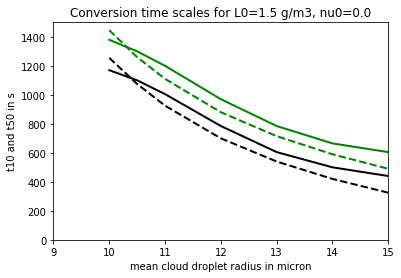

In [62]:

# chose initial liquid water content 
ii=5
nn=0

plt.plot(rc0*1e6, t10[0,ii,:,nn], 'k--', linewidth=2)
plt.plot(rc0*1e6, t10[1,ii,:,nn], 'k-', linewidth=2)
plt.plot(rc0*1e6, t50[0,ii,:,nn], 'g--', linewidth=2)
plt.plot(rc0*1e6, t50[1,ii,:,nn], 'g-', linewidth=2)

Lini = qc0_data[ii]*1e3

plt.title('Conversion time scales for L0=%3.1f'%Lini+' g/m3, nu0=%2.1f'%nu0[nn])

plt.ylabel('t10 and t50 in s')
plt.xlabel('mean cloud droplet radius in micron')

plt.xlim(9,15)  # 9 micron was not in the training data  
plt.ylim(0,1500)

plt.yscale('linear')
plt.xscale('linear')
plt.show()

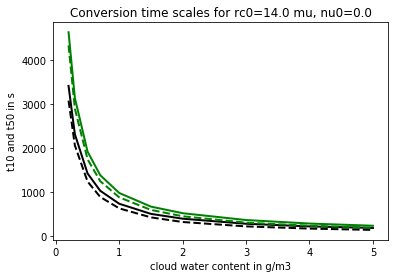

In [63]:

# chose initial drop radius
jj=5

plt.plot(qc0*1e3, t10[0,:,jj,nn], 'k--', linewidth=2)
plt.plot(qc0*1e3, t10[1,:,jj,nn], 'k-', linewidth=2)
plt.plot(qc0*1e3, t50[0,:,jj,nn], 'g--', linewidth=2)
plt.plot(qc0*1e3, t50[1,:,jj,nn], 'g-', linewidth=2)

Lini = qc0_data[jj]*1e3
Rini = rc0_data[jj]*1e6

plt.title('Conversion time scales for rc0=%3.1f'%Rini+' mu, nu0=%2.1f'%nu0[nn])

plt.ylabel('t10 and t50 in s')
plt.xlabel('cloud water content in g/m3')

plt.yscale('linear')
plt.xscale('linear')
plt.show()

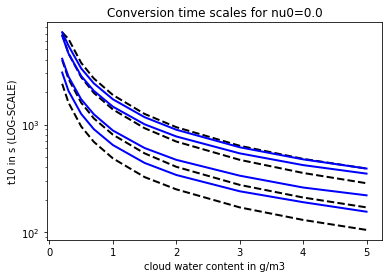

In [64]:
for jj in range(0,nrc,2):
    plt.plot(qc0*1e3, t10[0,:,jj,nn], 'k--', linewidth=2)
    plt.plot(qc0*1e3, t10[1,:,jj,nn], 'b-', linewidth=2)

Lini = qc0_data[jj]*1e3
Rini = rc0_data[jj]*1e6

plt.title('Conversion time scales for nu0=%2.1f'%nu0[nn])

plt.ylabel('t10 in s (LOG-SCALE)')
plt.xlabel('cloud water content in g/m3')

plt.yscale('log')
plt.xscale('linear')
plt.show()

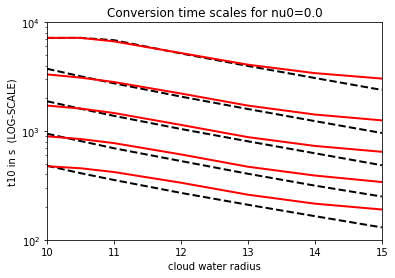

In [65]:
for ii in range(0,nqc,2):
    plt.plot(rc0*1e6, t10[0,ii,:,nn], 'k--', linewidth=2)
    plt.plot(rc0*1e6, t10[1,ii,:,nn], 'r-', linewidth=2)

Lini = qc0_data[ii]*1e3

plt.title('Conversion time scales for nu0=%2.1f'%nu0[nn])

plt.ylabel('t10 in s  (LOG-SCALE)')
plt.xlabel('cloud water radius')

plt.xlim(10,15)  # 9 micron was not in the training data  
plt.ylim(100,1e4)

plt.yscale('log')
plt.xscale('linear')
plt.show()

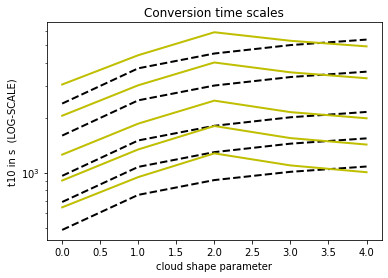

In [66]:
for ii in range(0,nnu,1):
    plt.plot(nu0, t10[0,ii,jj,:], 'k--', linewidth=2)
    plt.plot(nu0, t10[1,ii,jj,:], 'y-', linewidth=2)

Lini = qc0_data[ii]*1e3

plt.title('Conversion time scales')

plt.ylabel('t10 in s  (LOG-SCALE)')
plt.xlabel('cloud shape parameter')

plt.yscale('log')
plt.xscale('linear')
plt.show()

# Some quick time series plots

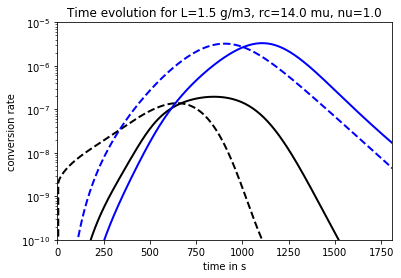

In [67]:

jj=5
ii=5
nn=1

xmax = 1.8 * np.max(t50[:,jj,ii,nn])
qmax = qc0_data[jj]

plt.plot(time, AU[0,jj,ii,nn,:], 'k--', linewidth=2)
plt.plot(time, AU[1,jj,ii,nn,:], 'k-', linewidth=2)
plt.plot(time, AC[0,jj,ii,nn,:], 'b--', linewidth=2)
plt.plot(time, AC[1,jj,ii,nn,:], 'b-', linewidth=2)

Lini = qc0_data[jj]*1e3
Rini = rc0_data[ii]*1e6
NUini = nu0_data[nn]

plt.title('Time evolution for L=%3.1f'%Lini+' g/m3, rc=%3.1f'%Rini+' mu, nu=%2.1f'%NUini)
plt.xlabel('time in s')
plt.ylabel('conversion rate')
plt.ylim(1e-10,1e-5)  
plt.xlim(0,xmax)  

plt.yscale('log')
plt.xscale('linear')
plt.show()

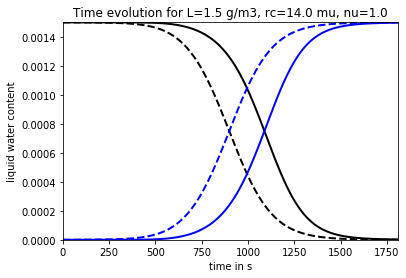

In [68]:
plt.plot(time, qc_data[0,jj,ii,nn,:], 'k--', linewidth=2)
plt.plot(time, qc_data[1,jj,ii,nn,:], 'k-', linewidth=2)
plt.plot(time, qr_data[0,jj,ii,nn,:], 'b--', linewidth=2)
plt.plot(time, qr_data[1,jj,ii,nn,:], 'b-', linewidth=2)

plt.title('Time evolution for L=%3.1f'%Lini+' g/m3, rc=%3.1f'%Rini+' mu, nu=%2.1f'%NUini)
plt.xlabel('time in s')
plt.ylabel('liquid water content')
plt.ylim(0,qmax)  
plt.xlim(0,xmax)  

plt.yscale('linear')
plt.xscale('linear')
plt.show()